Accuracy of test data: 82.03 %
Prediction for data1, predicted class: 0
Prediction for data2, predicted class: 1

K = 1
Number of samples in cluster 1 is: 23364


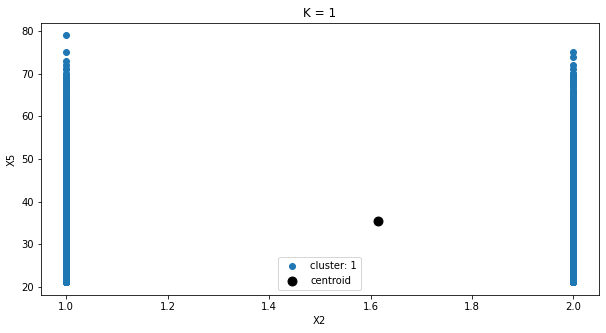


K = 2
Number of samples in cluster 2 is: 14878
Number of samples in cluster 1 is: 8486


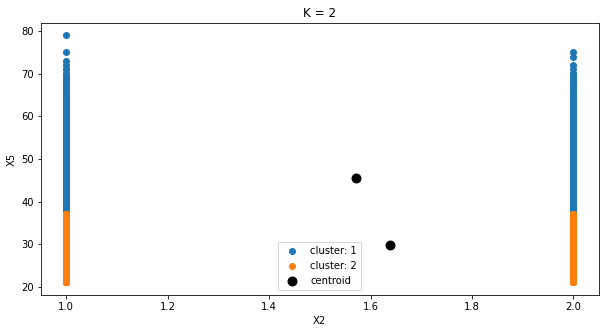


K = 3
Number of samples in cluster 1 is: 11394
Number of samples in cluster 2 is: 8479
Number of samples in cluster 3 is: 3491


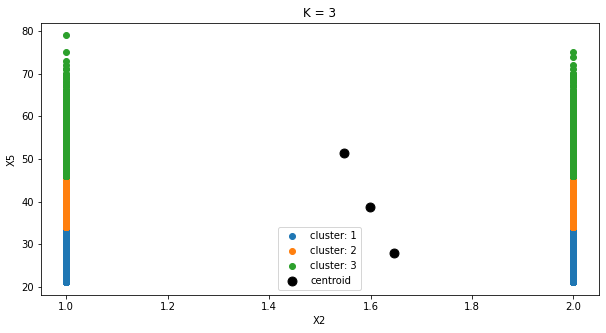


K = 4
Number of samples in cluster 2 is: 8542
Number of samples in cluster 3 is: 7086
Number of samples in cluster 4 is: 5039
Number of samples in cluster 1 is: 2697


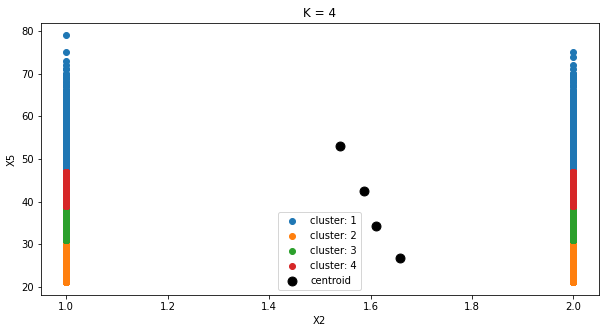


K = 5
Number of samples in cluster 1 is: 6196
Number of samples in cluster 4 is: 6129
Number of samples in cluster 5 is: 5380
Number of samples in cluster 3 is: 3657
Number of samples in cluster 2 is: 2002


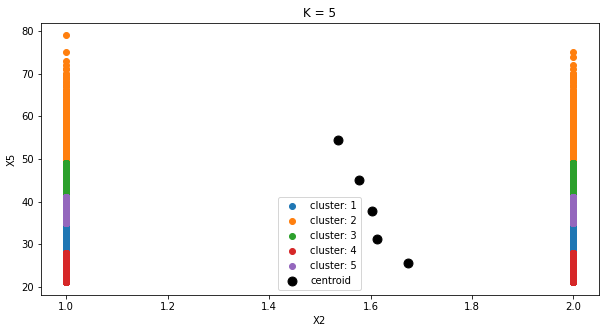


K = 6
Number of samples in cluster 1 is: 6621
Number of samples in cluster 6 is: 5165
Number of samples in cluster 3 is: 4245
Number of samples in cluster 4 is: 3842
Number of samples in cluster 2 is: 2719
Number of samples in cluster 5 is: 772


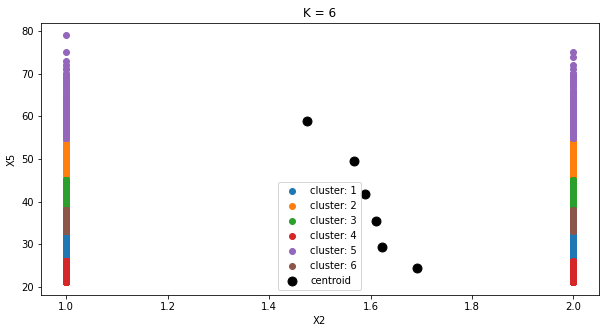


K = 7
Number of samples in cluster 4 is: 5006
Number of samples in cluster 5 is: 4536
Number of samples in cluster 2 is: 4524
Number of samples in cluster 3 is: 4248
Number of samples in cluster 6 is: 2353
Number of samples in cluster 1 is: 1925
Number of samples in cluster 7 is: 772


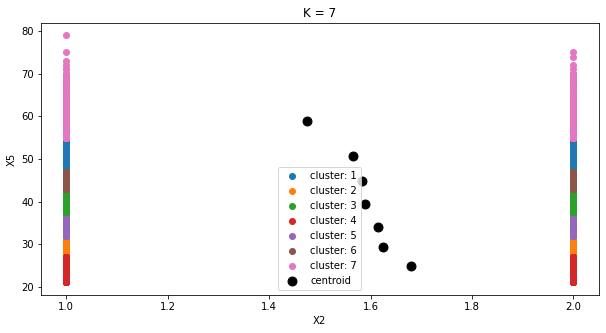

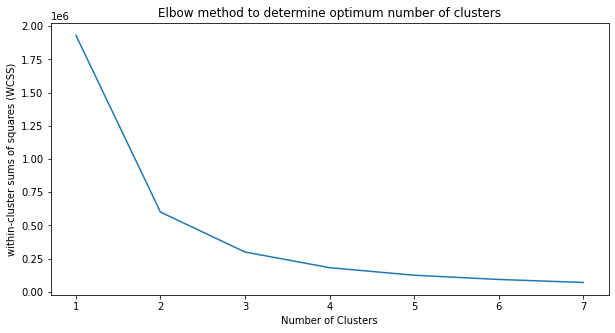

In [68]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("CreditCardClients.csv") # read data

x = df.drop(columns=['ID','Y']).values # get x training data
y = df['Y'].values # get corresponding labels

x_train, x_test, y_train, y_test =\
    train_test_split(x, y, test_size=0.1, random_state=0) # 90/10 split

scaler = StandardScaler() # initialize scaler
x_train = scaler.fit_transform(x_train) # fit and transform data

log_reg = LogisticRegression(solver='liblinear', C=1, multi_class='ovr', random_state=0) # initialize model
log_reg.fit(x_train, y_train) # train model

x_test = scaler.transform(x_test) # transform test data
y_pred = log_reg.predict(x_test) # predict based on test data
print("Accuracy of test data:", np.around(log_reg.score(x_test, y_test)*100, decimals=2), '%')

data1 = np.array([[150000, 1, 3, 2, 43, -1, -1, -1, -1, 0, 0, 1683, 1828, 3502, 
         8979, 5190, 0, 1837, 3526, 8998, 129, 0, 0]])
data2 = np.array([[30000, 1, 2, 2, 37, 4, 3, 2, -1, 0, 0, 3565, 3356, 2758, 
         20878, 20582, 19357, 0, 0, 22000, 4200, 2000, 3100]])
data1 = scaler.transform(data1)
data2 = scaler.transform(data2)

print("Prediction for data1, predicted class:",log_reg.predict(data1)[0])
print("Prediction for data2, predicted class:",log_reg.predict(data2)[0])

df_not = df[df['Y'] == 0]

sse = {}
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, max_iter=1000)
    label = kmeans.fit_predict(df_not[['X2','X5']])
    u_labels = np.unique(label)
    df_not["clusters"] = kmeans.labels_
    centroids = kmeans.cluster_centers_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    
    num_elements = df_not['clusters'].value_counts().to_numpy()
    clusters = df_not['clusters'].value_counts().index.to_numpy()
    
    print("\nK =", k)
    for i in range(len(num_elements)):
        print("Number of samples in cluster", clusters[i]+1, "is:", num_elements[i])
    
    plt.figure(figsize=(10,5))
    plt.title("K = " + str(k))
    for i in u_labels:
        plt.scatter(df_not[df_not["clusters"] == i]['X2'], 
                    df_not[df_not["clusters"] == i]['X5'],
                    label="cluster: "+ str(i+1))
    plt.xlabel("X2")
    plt.ylabel("X5")
    plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k',label='centroid')
    plt.legend()
    plt.show()
    
    df_not.drop(columns=['clusters'],inplace=True)
    
plt.figure(figsize=(10,5))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('Number of Clusters')
plt.ylabel('within-cluster sums of squares (WCSS)')
plt.title('Elbow method to determine optimum number of clusters')
plt.show()
